In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Linear Least Squares Fit

For a set of $(x_i, y_i)$ data points, we aim to find the best $f(x_i) = mx_i + b$ that fits our data.

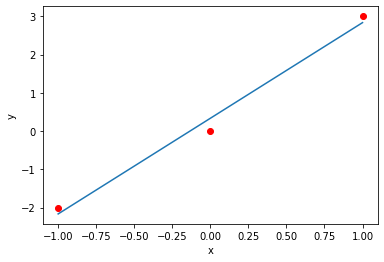

In [34]:
# Generating a small set of data points
data = np.array([[-1,-2], [0,0], [1,3]])
x = data[:,0]
y = data[:,1]

m, b = np.polyfit(x,y,1) # Coordinates and degree
f = m*x + b

# Plotting
plt.plot(x,y, marker='o', linestyle='none',c='r')
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

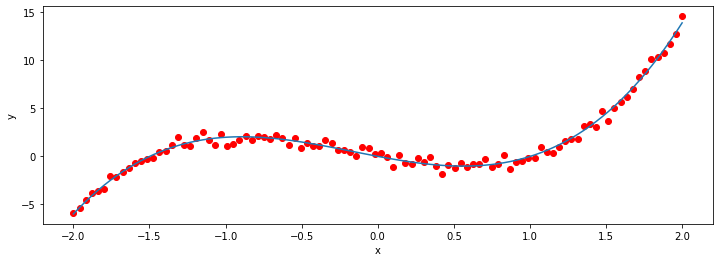

In [35]:
# A second example

x = np.linspace(-2, 2,100)
y = 2*x**3 + x**2 - 3*x
error = 0.4 * np.random.randn(100)
y = y + error

a,b,c,d = np.polyfit(x,y,3)
f = a*x**3 + b*x**2 + c*x + d

plt.figure(figsize=(12,4))
plt.plot(x,y, marker='o', linestyle='none', c='r')
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Euler Method

Euler's method for solving differential equations.

$$\frac{dx(t)}{dt} = f(x,t), \, with \, x(t_0) = x_0.$$

Recall the Taylor expansion for $x(t)$:

$$x(t + h) = x(t) + h \, x'(t)  = x(t) + h \, f(x,t)$$

In [36]:
# Lets solve dx/dt = cos(t) with x(0) = 0.

x0 = 0
h = 0.1
t_values = np.arange(0, 2*np.pi, h)

def f(t):
    return np.cos(t)

x = x0
x_values = []

for t in t_values:
    x_values.append(x)
    x = x + h * f(t)
    

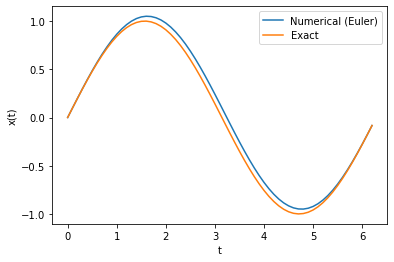

In [39]:
plt.plot(t_values, x_values, label='Numerical (Euler)')
plt.plot(t_values, np.sin(t_values), label='Exact')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Simultaneous 1st Order ODEs

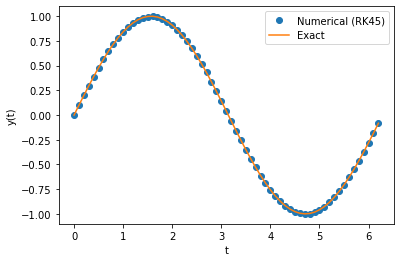

In [40]:
# Now we're using an out-of-the-box ode solver that uses RK4. Let's solve our previous example again.

y0 = 0
h = 0.1
t_values = np.arange(0, 2*np.pi, h)

def f(t, y):
    return np.cos(t)


sol = integrate.solve_ivp(f, (0, 2*np.pi), [y0], t_eval=t_values)
y = sol.y[0]

plt.plot(t_values, y,'o' ,label='Numerical (RK45)')
plt.plot(t_values, np.sin(t_values), label='Exact')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Now, lets solve these coupled ODEs:

$$\frac{dx}{dt} = \cos(y)$$
$$\frac{dy}{dt} = \sin(x)$$

with $x(0) = y(0) = 1$

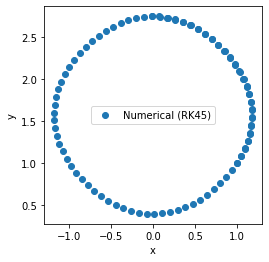

In [51]:
# We can also solve simultaneous 1st order ODEs

def f(t, r):
    x, y = r
    fx = np.cos(y)
    fy = np.sin(x)
    return fx, fy

r0 = [1, 1]

sol = integrate.solve_ivp(f, (0, 10), r0, t_eval=np.linspace(0, 10, 100))
x = sol.y[0]
y = sol.y[1]

plt.plot(x, y,'o' ,label='Numerical (RK45)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('scaled')
plt.legend()
plt.show()

Our next example is a SIR model. Our model only contains Susceptible, Infected and Recovered people. We assume their rate of change is:

$$ \frac{dS}{dt} = -a \, S \,I$$
$$ \frac{dI}{dt} = +a \, S \,I - b \, I$$
$$ \frac{dR}{dt} = b \, I$$


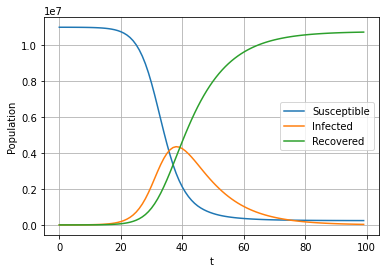

In [11]:
def f(t, y, beta, gamma, N):
    S, I, R = y
    a = beta/N
    b = gamma
    fS = -a*S*I
    fI = +a*S*I - b*I
    fR = +b*I
    return [fS, fI, fR]

N = 1.1e7 # Population size
I0 = 574 # Initial infected people
beta = 0.39 # Controls the transmission rate
gamma = 0.1 # Controls the recovery rate
init_conditions = [N - I0, I0, 0] # Initial conditions S0, I0, R0

sol = integrate.solve_ivp(f, (0, 100), init_conditions, t_eval=np.arange(0, 100, 1), args=(beta, gamma, N))
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]
t = sol.t

plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('t')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()